### Advance Pandas

In [3]:
!pip install pandas

In [4]:
import pandas as pd

### a. Creating a Series

In [6]:
s = pd.Series([10,20,30,40,50])

In [10]:
print(s)

0    10
1    20
2    30
3    40
4    50
dtype: int64


### b. Creating a Dataframe

In [13]:
data = {
    'Name' : ['John' , 'Anna' , 'Dip' , 'Rahul'],
    'Age' : [12,24 ,22 ,19],
    'City': ['Haldia', 'Paris' , 'Berlin' , 'London']
}

In [15]:
df=pd.DataFrame(data)

In [17]:
print(df)

    Name  Age    City
0   John   12  Haldia
1   Anna   24   Paris
2    Dip   22  Berlin
3  Rahul   19  London


In [19]:
df

,Name,Age,City
0,John,12,Haldia
1,Anna,24,Paris
2,Dip,22,Berlin
3,Rahul,19,London


In [21]:
# Select a row by index
print(df.iloc[0])

Name      John
Age         12
City    Haldia
Name: 0, dtype: object


In [23]:
# Select a row by label
print(df.loc[1])

Name     Anna
Age        24
City    Paris
Name: 1, dtype: object


In [25]:

# Select multiple rows
print(df.iloc[1:3])

   Name  Age    City
1  Anna   24   Paris
2   Dip   22  Berlin


In [27]:
# Filter rows where Age is greater than 30
print(df[df['Age'] > 20])


   Name  Age    City
1  Anna   24   Paris
2   Dip   22  Berlin


In [29]:
# Adding a new column 'Country'
df['Country'] = ['USA', 'France', 'Germany', 'UK']
print(df)

    Name  Age    City  Country
0   John   12  Haldia      USA
1   Anna   24   Paris   France
2    Dip   22  Berlin  Germany
3  Rahul   19  London       UK


In [31]:
# Drop a column
df = df.drop(columns=['Country'])
print(df)

    Name  Age    City
0   John   12  Haldia
1   Anna   24   Paris
2    Dip   22  Berlin
3  Rahul   19  London


In [33]:
# Drop a row by index
df = df.drop(index=1)
print(df)

    Name  Age    City
0   John   12  Haldia
2    Dip   22  Berlin
3  Rahul   19  London


In [35]:
# Summary statistics
print(df.describe())

             Age
count   3.000000
mean   17.666667
std     5.131601
min    12.000000
25%    15.500000
50%    19.000000
75%    20.500000
max    22.000000


In [37]:
# Mean of a column
print(df['Age'].mean())

17.666666666666668


In [39]:
# Count of unique values in a column
print(df['City'].value_counts())

City
Haldia    1
Berlin    1
London    1
Name: count, dtype: int64


In [41]:
# Check for missing data
print(df.isnull())

    Name    Age   City
0  False  False  False
2  False  False  False
3  False  False  False


In [43]:
# Count of missing values
print(df.isnull().sum())

Name    0
Age     0
City    0
dtype: int64


In [45]:
# Drop rows with missing data
df.dropna(inplace=True)

In [47]:
grouped = df.groupby('City')

In [49]:
print(grouped)

In [51]:
# Merging two DataFrames on a key column
df1 = pd.DataFrame({'key': ['A', 'B', 'C'], 'value': [1, 2, 3]})
df2 = pd.DataFrame({'key': ['A', 'B', 'D'], 'value': [4, 5, 6]})

merged = pd.merge(df1, df2, on='key', how='inner')

In [53]:
merged

,key,value_x,value_y
0,A,1,4
1,B,2,5


In [55]:
print(merged)

  key  value_x  value_y
0   A        1        4
1   B        2        5


In [57]:
data = {
    'Product': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Sales': [100, 150, 200, 110, 160, 210, 120, 170, 220],
    'Region': ['East', 'East', 'East', 'West', 'West', 'West', 'North', 'North', 'North']
}

In [59]:
df = pd.DataFrame(data)

In [61]:
# Create a pivot table
pivot_table = df.pivot_table(values='Sales', index='Region', columns='Product', aggfunc='sum')

In [63]:
print(pivot_table)

Product    A    B    C
Region                
East     100  150  200
North    120  170  220
West     110  160  210


In [65]:
pivot_table

Product,A,B,C
Region,,,
East,100,150,200
North,120,170,220
West,110,160,210


In [67]:
# Pivot table with multiple aggregate functions
pivot_table = df.pivot_table(values='Sales', index='Region', columns='Product', aggfunc=['sum', 'mean'])
print(pivot_table)

         sum             mean              
Product    A    B    C      A      B      C
Region                                     
East     100  150  200  100.0  150.0  200.0
North    120  170  220  120.0  170.0  220.0
West     110  160  210  110.0  160.0  210.0


## Working with Time-Series Data

In [70]:
# Create a time series
date_range = pd.date_range(start='2023-01-01', periods=6, freq='D')
data = {
    'Date': date_range,
    'Sales': [200, 220, 210, 215, 230, 250]
}

df = pd.DataFrame(data)

In [72]:
df

,Date,Sales
0,2023-01-01,200
1,2023-01-02,220
2,2023-01-03,210
3,2023-01-04,215
4,2023-01-05,230
5,2023-01-06,250


In [74]:
df.set_index('Date', inplace=True)

In [76]:
df

,Sales
Date,
2023-01-01,200
2023-01-02,220
2023-01-03,210
2023-01-04,215
2023-01-05,230
2023-01-06,250


In [78]:
# Resample the data to calculate weekly sales total
weekly_sales = df.resample('W').sum()

In [80]:
weekly_sales

,Sales
Date,
2023-01-01,200
2023-01-08,1125


In [82]:
# Shift data by 1 day forward
df_shifted = df.shift(1)


In [84]:
print(df_shifted)

            Sales
Date             
2023-01-01    NaN
2023-01-02  200.0
2023-01-03  220.0
2023-01-04  210.0
2023-01-05  215.0
2023-01-06  230.0


In [86]:
# Calculate the rolling mean with a window of 3 days
rolling_mean = df['Sales'].rolling(window=3).mean()

In [88]:
print(rolling_mean)

Date
2023-01-01           NaN
2023-01-02           NaN
2023-01-03    210.000000
2023-01-04    215.000000
2023-01-05    218.333333
2023-01-06    231.666667
Name: Sales, dtype: float64


If your dataset is too large for pandas to handle, consider using Dask, which enables parallel computing and is compatible with pandas. Dask DataFrame provides a similar interface to pandas, but handles operations in parallel, allowing it to work with datasets that don't fit into memory.

In [91]:
!pip install dask[dataframe]

In [93]:
arrays = [
    ['East', 'East', 'West', 'West'],
    ['Apple', 'Banana', 'Apple', 'Banana']
]

index = pd.MultiIndex.from_arrays(arrays, names=('Region', 'Product'))
df = pd.DataFrame({'Sales': [100, 200, 300, 400]}, index=index)


In [95]:
df

Sales
Region Product       
East   Apple      100
       Banana     200
West   Apple      300
       Banana     400

In [97]:
# Access sales data for 'East' region
print(df.loc['East'])

         Sales
Product       
Apple      100
Banana     200


In [99]:
# Access sales data for 'East' region and 'Apple' product
print(df.loc[('East', 'Apple')])

Sales    100
Name: (East, Apple), dtype: int64


In [101]:
# Unstack the 'Product' level
unstacked = df.unstack(level='Product')
print(unstacked)

        Sales       
Product Apple Banana
Region              
East      100    200
West      300    400


In [103]:
# Stack back to original
stacked = unstacked.stack(future_stack=True)
print(stacked)

                Sales
Region Product       
East   Apple      100
       Banana     200
West   Apple      300
       Banana     400


In [105]:
df1 = pd.DataFrame({'key1': ['A', 'B', 'C'], 'key2': [1, 2, 3], 'value': [10, 20, 30]})
df2 = pd.DataFrame({'key1': ['A', 'B', 'D'], 'key2': [1, 2, 4], 'value': [40, 50, 60]})

# Merge on multiple keys
merged = pd.merge(df1, df2, on=['key1', 'key2'], how='inner')

In [107]:
print(merged)

  key1  key2  value_x  value_y
0    A     1       10       40
1    B     2       20       50


In [109]:
# Joining two DataFrames on index
df1 = pd.DataFrame({'value': [1, 2, 3]}, index=['A', 'B', 'C'])
df2 = pd.DataFrame({'value': [4, 5, 6]}, index=['A', 'B', 'D'])

joined = df1.join(df2, lsuffix='_left', rsuffix='_right')

In [111]:
print(joined)

   value_left  value_right
A           1          4.0
B           2          5.0
C           3          NaN


In [113]:
!pip install matplotlib


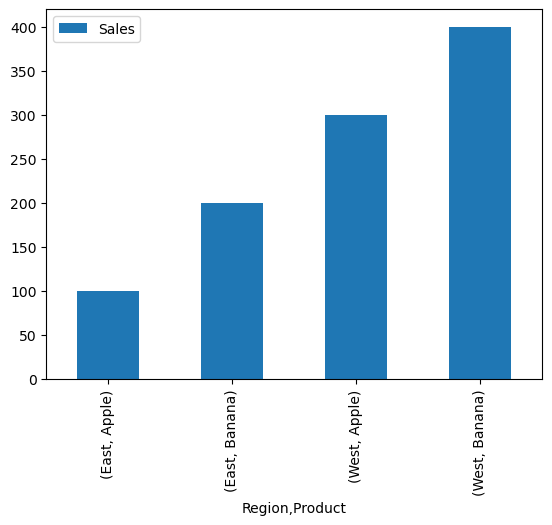

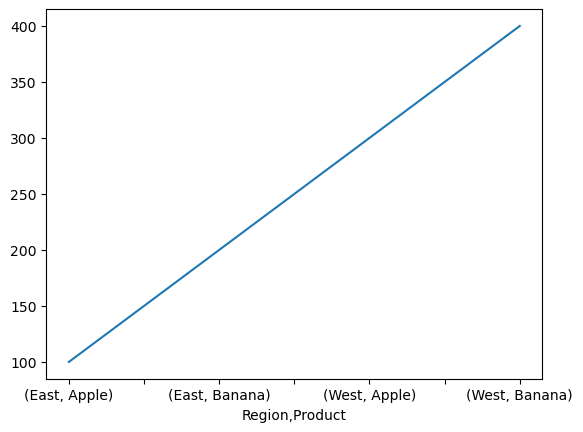

In [115]:
import matplotlib.pyplot as plt

# Plot data
df.plot(kind='bar')
plt.show()

# Plot a time-series
df['Sales'].plot()
plt.show()

In [117]:
import dask.dataframe as dd

When grouping by multiple columns, pandas creates a MultiIndex that allows for more granular control of grouped data.

In [120]:
# Sample data
data = {
    'Department': ['HR', 'HR', 'IT', 'IT', 'Finance', 'Finance'],
    'Employee': ['John', 'Anna', 'Peter', 'Linda', 'Steve', 'Kim'],
    'Salary': [70000, 65000, 80000, 85000, 95000, 90000],
    'Bonus': [5000, 4000, 6000, 7000, 8000, 7500]
}

df = pd.DataFrame(data)

# Group by Department and aggregate multiple columns
grouped = df.groupby('Department').agg({'Salary': 'mean', 'Bonus': 'sum'})

In [122]:
print(grouped)

             Salary  Bonus
Department                
Finance     92500.0  15500
HR          67500.0   9000
IT          82500.0  13000


You can apply custom functions to groups using agg or apply. Let’s create a custom aggregation to find the range of salaries.

In [127]:
# Custom aggregation function for salary range
grouped = df.groupby('Department').agg(
    Salary_Range=('Salary', lambda x: x.max() - x.min()),
    Avg_Bonus=('Bonus', 'mean')
)
print(grouped)


            Salary_Range  Avg_Bonus
Department                         
Finance             5000     7750.0
HR                  5000     4500.0
IT                  5000     6500.0


Pandas provides several window functions that allow you to perform calculations on sliding or expanding windows of data. These are especially useful for time-series analysis.

A rolling window aggregates data over a fixed-size moving window. Common operations include calculating rolling means, sums, or custom functions.

In [133]:
# Sample data
data = {'Date': pd.date_range(start='2023-01-01', periods=10), 'Value': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Rolling mean with a window of 3 periods
df['Rolling_Mean'] = df['Value'].rolling(window=3).mean()
print(df)


            Value  Rolling_Mean
Date                           
2023-01-01      1           NaN
2023-01-02      2           NaN
2023-01-03      3           2.0
2023-01-04      4           3.0
2023-01-05      5           4.0
2023-01-06      6           5.0
2023-01-07      7           6.0
2023-01-08      8           7.0
2023-01-09      9           8.0
2023-01-10     10           9.0


In [135]:
# Expanding sum
df['Expanding_Sum'] = df['Value'].expanding().sum()
print(df)

            Value  Rolling_Mean  Expanding_Sum
Date                                          
2023-01-01      1           NaN            1.0
2023-01-02      2           NaN            3.0
2023-01-03      3           2.0            6.0
2023-01-04      4           3.0           10.0
2023-01-05      5           4.0           15.0
2023-01-06      6           5.0           21.0
2023-01-07      7           6.0           28.0
2023-01-08      8           7.0           36.0
2023-01-09      9           8.0           45.0
2023-01-10     10           9.0           55.0


In [137]:
# Exponentially weighted mean
df['EWM'] = df['Value'].ewm(span=3).mean()
print(df)

            Value  Rolling_Mean  Expanding_Sum       EWM
Date                                                    
2023-01-01      1           NaN            1.0  1.000000
2023-01-02      2           NaN            3.0  1.666667
2023-01-03      3           2.0            6.0  2.428571
2023-01-04      4           3.0           10.0  3.266667
2023-01-05      5           4.0           15.0  4.161290
2023-01-06      6           5.0           21.0  5.095238
2023-01-07      7           6.0           28.0  6.055118
2023-01-08      8           7.0           36.0  7.031373
2023-01-09      9           8.0           45.0  8.017613
2023-01-10     10           9.0           55.0  9.009775


In [139]:
# Sample MultiIndex DataFrame
arrays = [
    ['North', 'North', 'South', 'South'],
    ['A', 'B', 'A', 'B']
]
index = pd.MultiIndex.from_arrays(arrays, names=('Region', 'Product'))
df = pd.DataFrame({'Sales': [100, 200, 300, 400]}, index=index)

# Select data for the 'North' region
print(df.xs('North'))


         Sales
Product       
A          100
B          200


In [141]:
# Select a cross-section across levels
print(df.xs('A', level='Product'))


        Sales
Region       
North     100
South     300


In [145]:
# Sample data
df = pd.DataFrame({
    'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Sales': [200, 150, 250, 300, 400, 350]
})

# Method chaining: filter and calculate mean sales for each category
result = (
    df[df['Sales'] > 200]  # Filter rows where sales are > 200
    .groupby('Category')    # Group by category
    .agg({'Sales': 'mean'}) # Aggregate mean sales
    .reset_index()          # Reset the index
)
print(result)


  Category  Sales
0        B  275.0
1        C  375.0


You can integrate custom functions into your method chain using pipe().

In [148]:
# Custom function for applying a discount
def apply_discount(df, discount):
    df['Discounted_Sales'] = df['Sales'] * (1 - discount)
    return df

# Apply custom function with pipe
result = (
    df.pipe(apply_discount, discount=0.1)
    .groupby('Category')
    .agg({'Discounted_Sales': 'mean'})
    .reset_index()
)
print(result)


  Category  Discounted_Sales
0        A             157.5
1        B             247.5
2        C             337.5


In [150]:
# Sample wide-format DataFrame
df = pd.DataFrame({
    'City': ['NY', 'LA', 'SF'],
    '2020': [200, 300, 400],
    '2021': [250, 350, 450]
})

# Melt the DataFrame
melted_df = pd.melt(df, id_vars=['City'], var_name='Year', value_name='Sales')
print(melted_df)


  City  Year  Sales
0   NY  2020    200
1   LA  2020    300
2   SF  2020    400
3   NY  2021    250
4   LA  2021    350
5   SF  2021    450


In [152]:
# Sparse DataFrame
df = pd.DataFrame({
    'A': [0, 0, 1, 0, 2],
    'B': [0, 0, 0, 0, 3]
}).astype(pd.SparseDtype("int", fill_value=0))

print(df.sparse.density)  # Density: proportion of non-zero elements

0.30000000000000004


In [154]:
# Sparse Series
sparse_series = pd.Series([0, 1, 0, 0, 2], dtype=pd.SparseDtype("int", fill_value=0))
print(sparse_series)

0    0
1    1
2    0
3    0
4    2
dtype: Sparse[int32, 0]


In [156]:
# Sample DataFrame
df = pd.DataFrame({'Names': ['John Doe', 'Anna Smith', 'Peter Brown']})

# Apply string operations
df['First_Name'] = df['Names'].str.split().str[0]
df['Last_Name'] = df['Names'].str.split().str[1]
df['Upper'] = df['Names'].str.upper()
print(df)


         Names First_Name Last_Name        Upper
0     John Doe       John       Doe     JOHN DOE
1   Anna Smith       Anna     Smith   ANNA SMITH
2  Peter Brown      Peter     Brown  PETER BROWN


In [158]:
# Searching for a substring
df['Has_Smith'] = df['Names'].str.contains('Smith')

# Replacing substrings
df['Names_Updated'] = df['Names'].str.replace('Smith', 'Johnson')
print(df)


         Names First_Name Last_Name        Upper  Has_Smith Names_Updated
0     John Doe       John       Doe     JOHN DOE      False      John Doe
1   Anna Smith       Anna     Smith   ANNA SMITH       True  Anna Johnson
2  Peter Brown      Peter     Brown  PETER BROWN      False   Peter Brown


In [162]:

from io import StringIO

# JSON example
data = '''
[
    {"name": "John", "age": 30, "city": "New York"},
    {"name": "Anna", "age": 25, "city": "Los Angeles"},
    {"name": "Peter", "age": 45, "city": "Chicago"}
]
'''

# Wrap the JSON string with StringIO
df = pd.read_json(StringIO(data))
print(df)


    name  age         city
0   John   30     New York
1   Anna   25  Los Angeles
2  Peter   45      Chicago


In [164]:
# Nested JSON data
data_nested = {
    'id': [1, 2],
    'info': [{'name': 'John', 'age': 30}, {'name': 'Anna', 'age': 25}]
}

# Create DataFrame and flatten the nested dictionary
df = pd.json_normalize(data_nested, 'info', ['id'])
print(df)


   name  age      id
0  John   30  [1, 2]
1  Anna   25  [1, 2]


In [168]:
# Sample data
df = pd.DataFrame({'Score': [10, 20, 30, 40, 50]})

# Calculate expanding mean
df['Expanding_Mean'] = df['Score'].expanding().mean()
print(df)

   Score  Expanding_Mean
0     10            10.0
1     20            15.0
2     30            20.0
3     40            25.0
4     50            30.0


In [172]:
# Calculate exponentially weighted mean
df['EWM_Mean'] = df['Score'].ewm(span=3, adjust=False).mean()
print(df)


   Score  Expanding_Mean  EWM_Mean
0     10            10.0    10.000
1     20            15.0    15.000
2     30            20.0    22.500
3     40            25.0    31.250
4     50            30.0    40.625


In [174]:
# Sample data
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

# Evaluate expression within DataFrame
df['A_plus_B'] = df.eval('A + B')
print(df)

   A  B  A_plus_B
0  1  4         5
1  2  5         7
2  3  6         9


In [178]:

df = pd.DataFrame({'A': [1, 2, 3], 'B': [10, 20, 30]})

# Square each element
df_squared = df.apply(lambda x: x ** 2)
print(df_squared)


   A    B
0  1  100
1  4  400
2  9  900


In [180]:
# Sample data
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [23, 24, 25, 22],
    'Score': [85, 92, 78, 88]
})

# Use query to filter rows
filtered_df = df.query('Age > 23 and Score > 80')
print(filtered_df)


  Name  Age  Score
1  Bob   24     92


In [182]:
# Sample data
df = pd.DataFrame({
    'Department': ['HR', 'IT', 'Finance', 'HR', 'IT'],
    'Salary': [50000, 60000, 55000, 58000, 65000],
    'Bonus': [5000, 7000, 4000, 6000, 8000]
})

# Group by Department with multiple aggregations
grouped = df.groupby('Department').agg(
    Avg_Salary=('Salary', 'mean'),
    Total_Bonus=('Bonus', 'sum')
)
print(grouped)


            Avg_Salary  Total_Bonus
Department                         
Finance        55000.0         4000
HR             54000.0        11000
IT             62500.0        15000


In [184]:
# Calculate the department average salary and add as a new column
df['Dept_Avg_Salary'] = df.groupby('Department')['Salary'].transform('mean')
print(df)


  Department  Salary  Bonus  Dept_Avg_Salary
0         HR   50000   5000          54000.0
1         IT   60000   7000          62500.0
2    Finance   55000   4000          55000.0
3         HR   58000   6000          54000.0
4         IT   65000   8000          62500.0
